# SETUP

In [1]:
import os
os.getcwd()
os.chdir("..")

In [2]:
import pandas as pd
from plotnine import *

In [3]:
from src.visualization.visualize import plot_boxplot_by_cluster, plot_scatter_by_cluster, plot_share_of_binary_vars_per_clusters, plot_stacked_vars_per_clusters

# Data load

In [4]:
df = pd.read_pickle('data/processed/marketing_campaign_with_clusters.pickle')

In [5]:
df.nb_accepted_campaigns.describe()

count    2230.000000
mean        0.298206
std         0.678680
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: nb_accepted_campaigns, dtype: float64

# Clusters profiling

In [6]:
num_features_to_scale = ["age", "tenure_days",
                         "recency", "income_per_person", "total_spendings", "total_spendings_per_person", "total_spendings_per_purchase",
                         "numwebvisitsmonth", "total_purchases",
                         "spendings_to_income"]

other_num_features = ["is_parent", "nb_family_members", 
                      "wines_share", "fruits_share", "meat_share", "fish_share", "sweets_share", "gold_products_share",
                      "pct_deals_purchases", "pct_web_purchasess", "pct_catalog_purchases", "pct_store_purchases",
                      "complain", "response", "nb_accepted_campaigns"]

cat_features = ["marital_status_cleaned", "education_cleaned"]

## Purchase behaviour

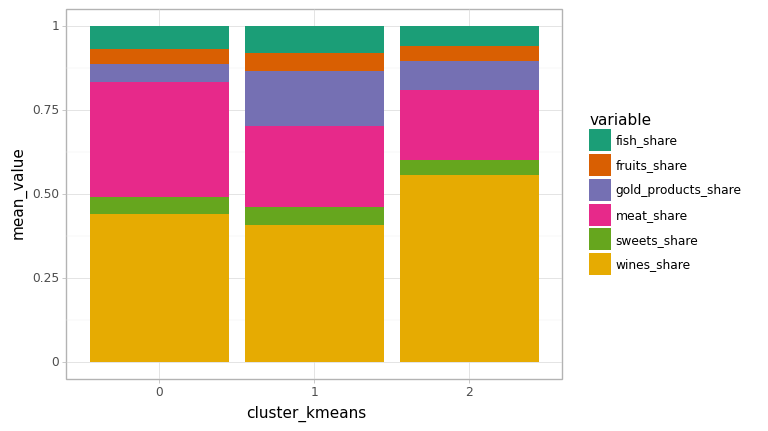

In [7]:
vars_list = ["wines_share", "fruits_share", "meat_share", "fish_share", "sweets_share", "gold_products_share"]
plot_stacked_vars_per_clusters(df, vars_list, "cluster_kmeans")

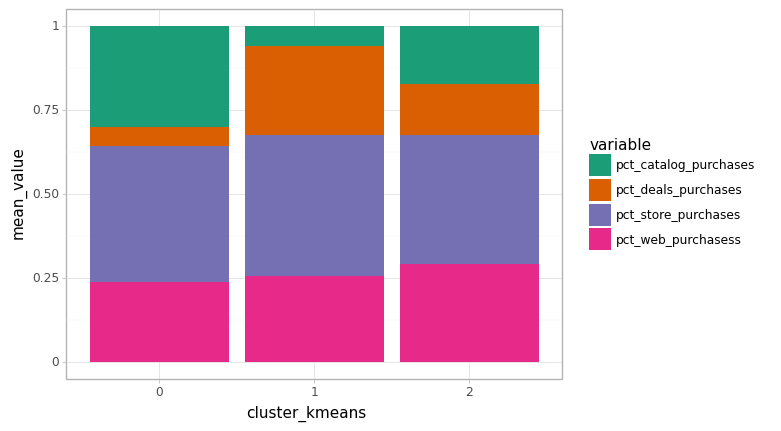

In [8]:
vars_list = ["pct_deals_purchases", "pct_web_purchasess", "pct_catalog_purchases", "pct_store_purchases"]
plot_stacked_vars_per_clusters(df, vars_list, "cluster_kmeans")

## Density of each numeric var per cluster

With removed lowest and highest observations

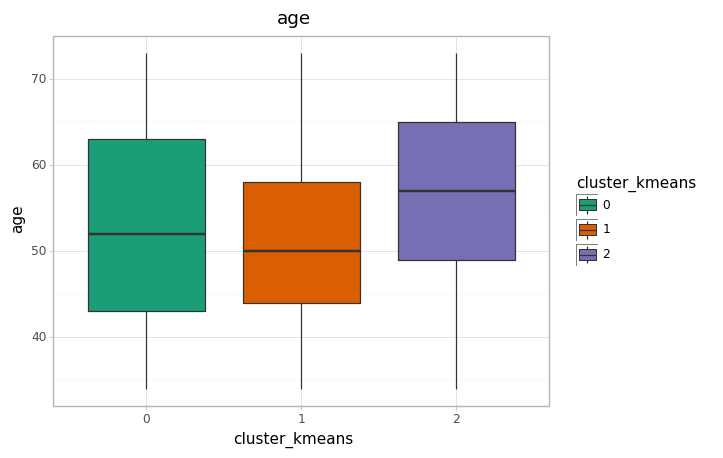

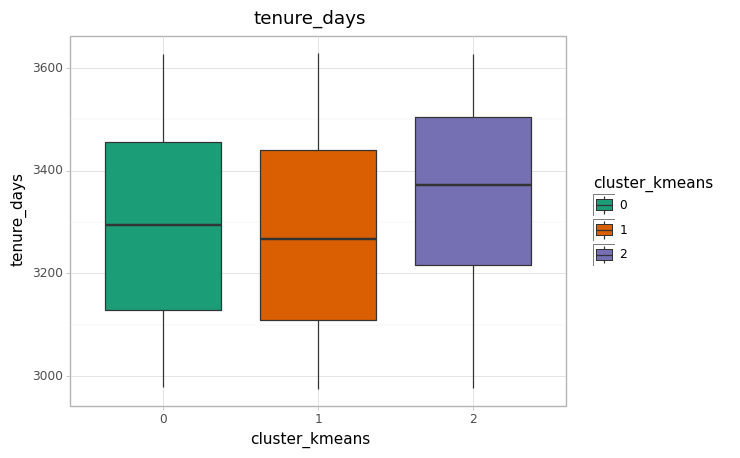

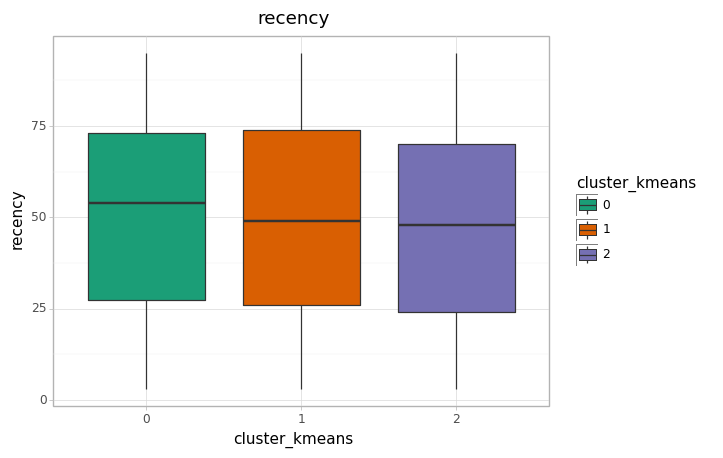

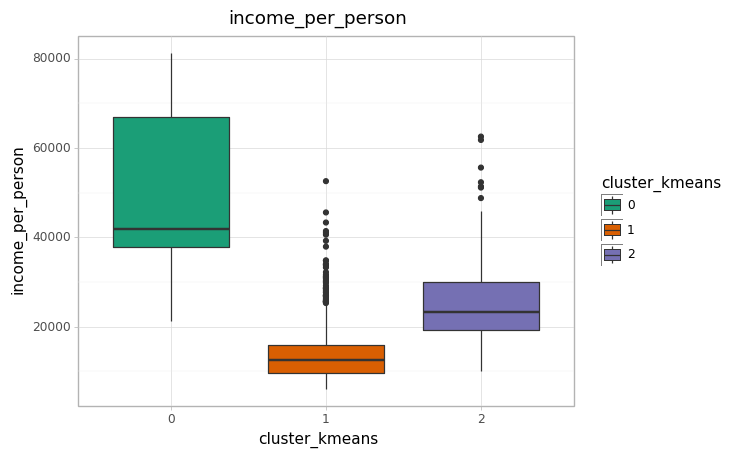

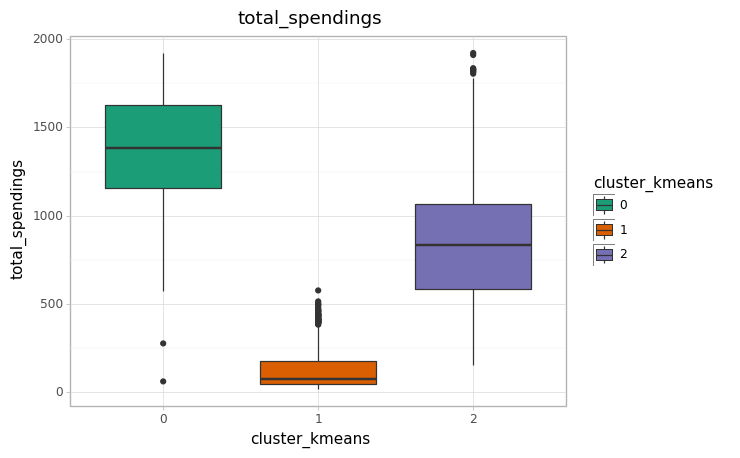

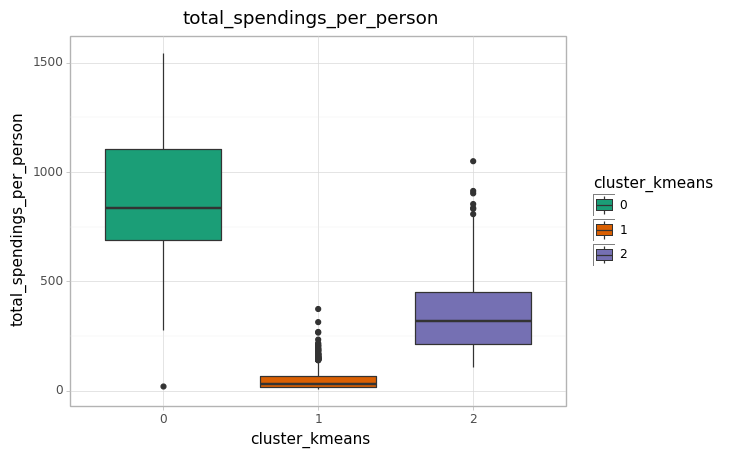

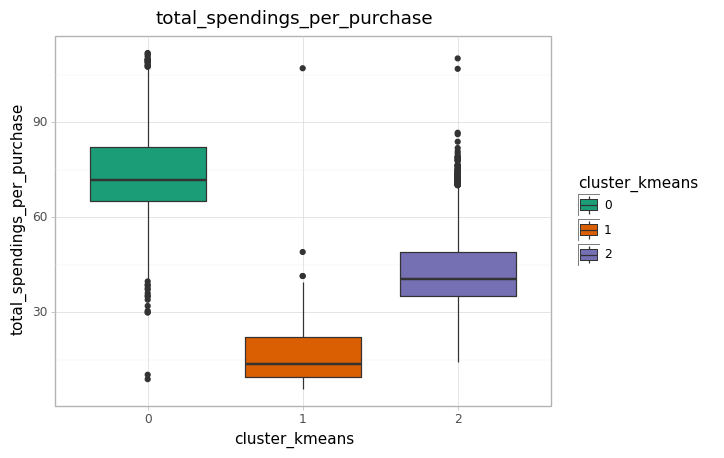

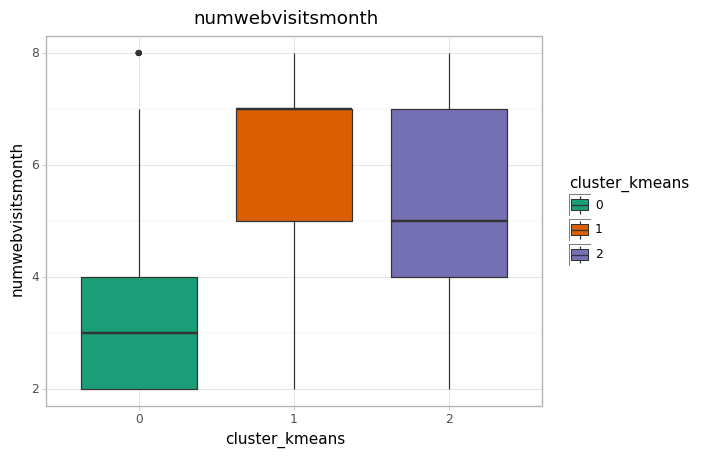

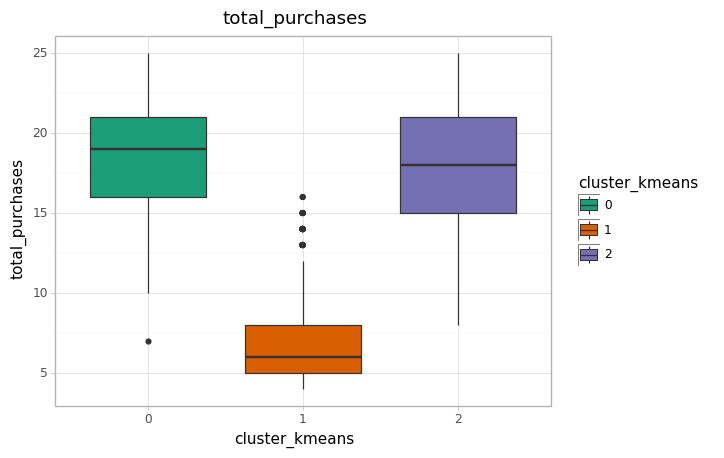

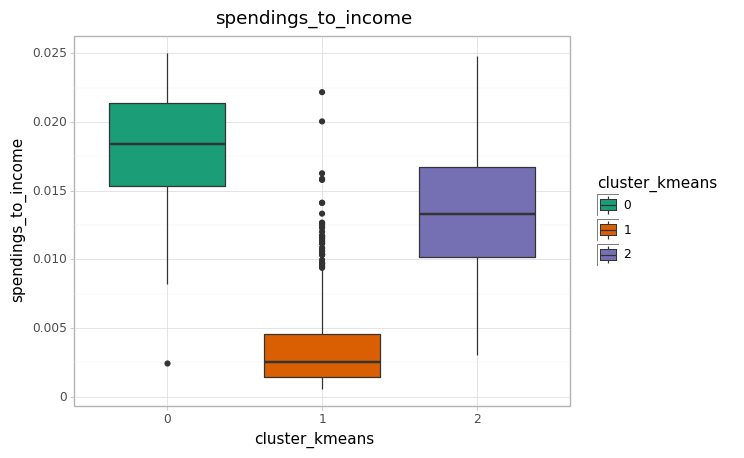

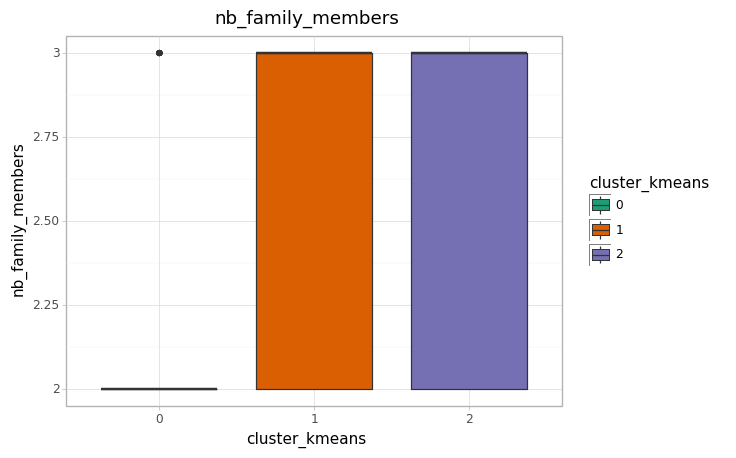

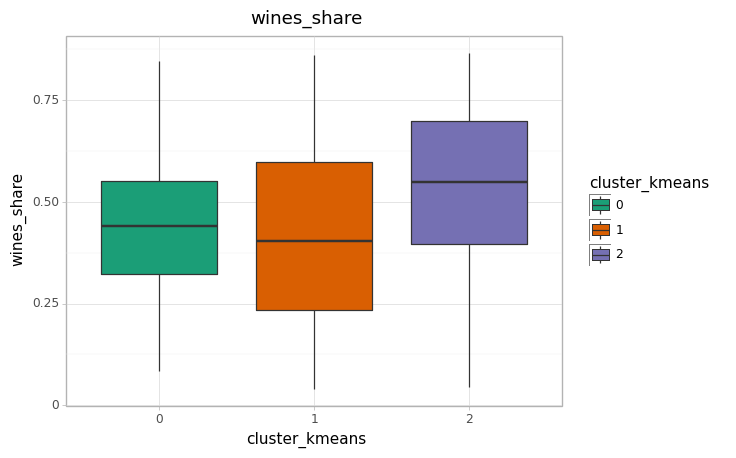

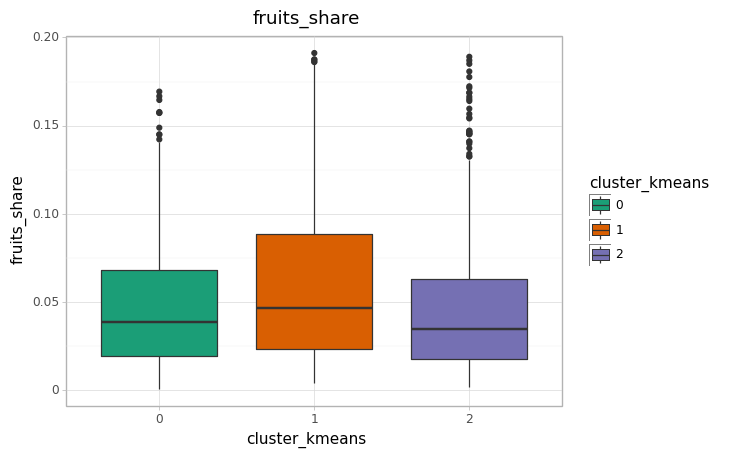

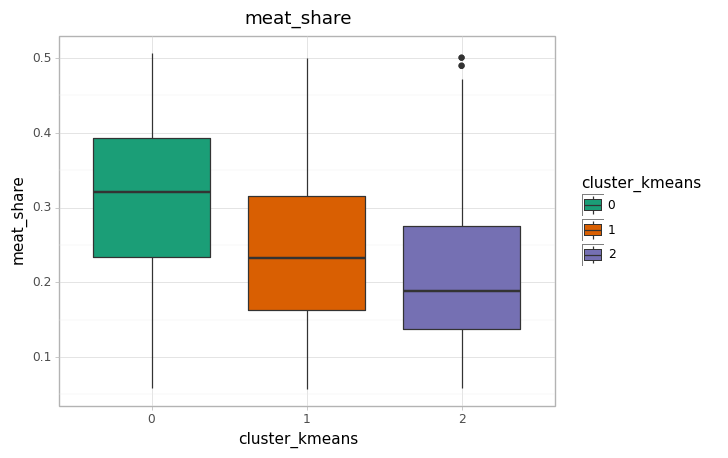

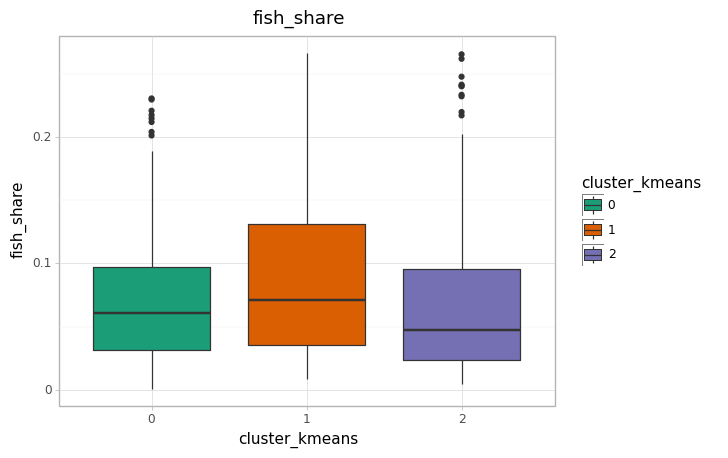

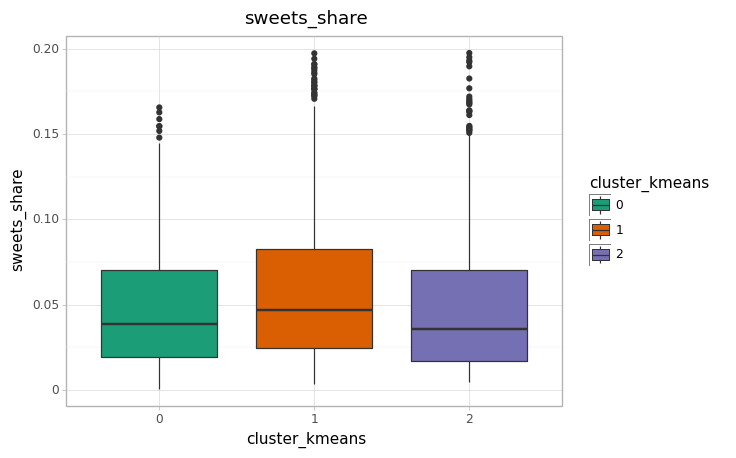

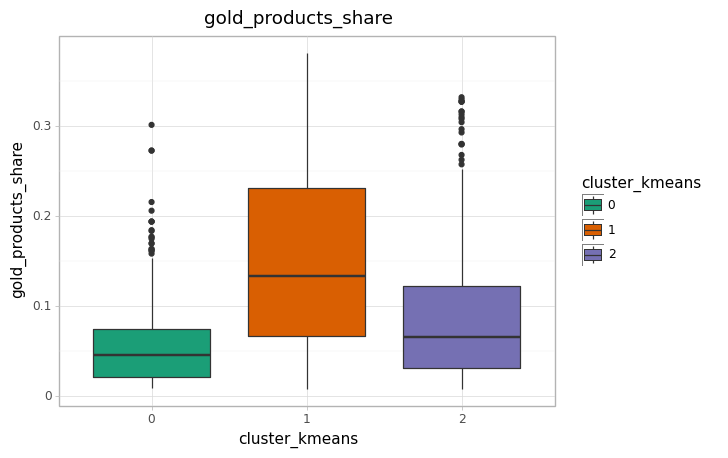

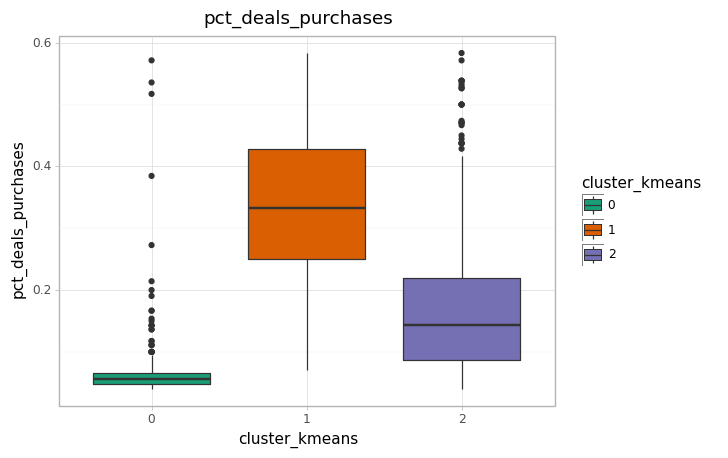

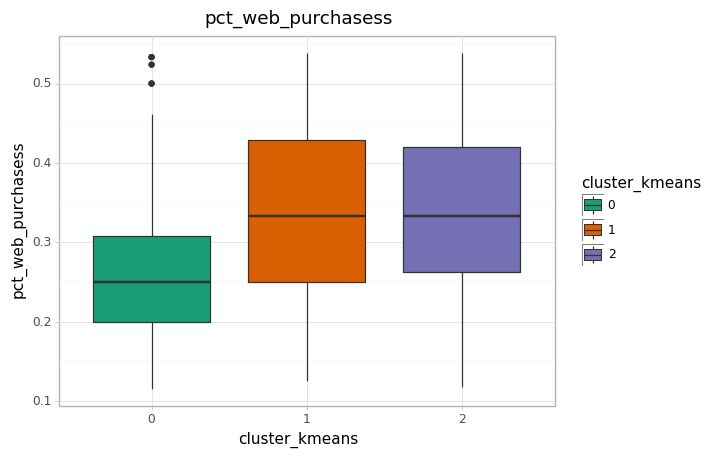

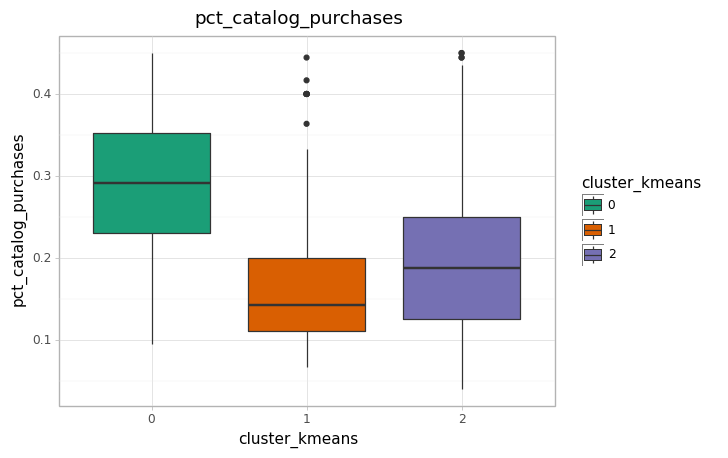

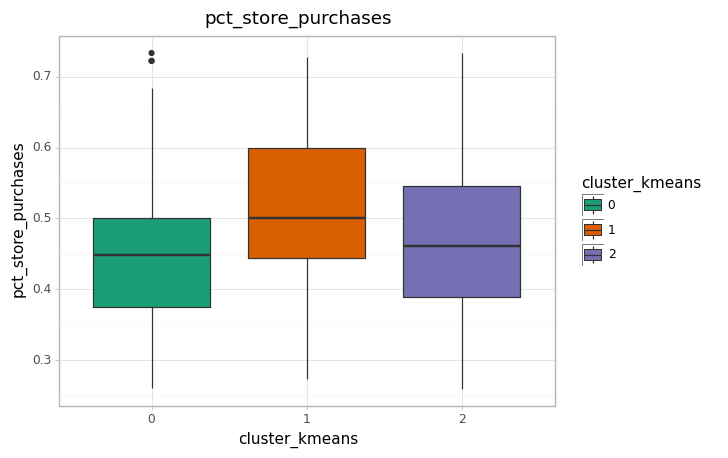

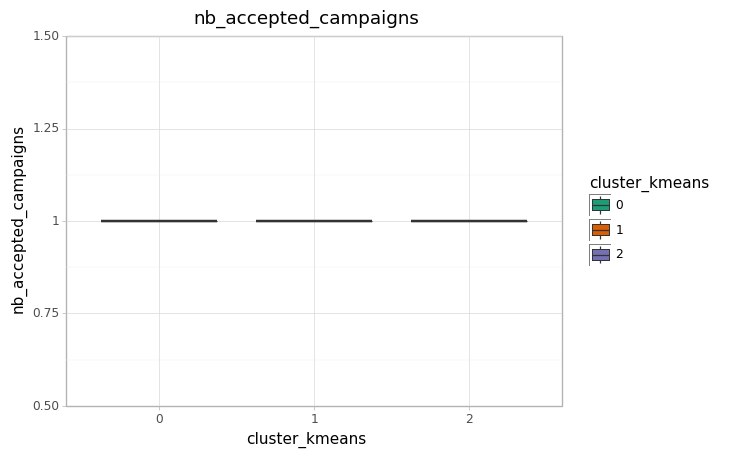

In [9]:
all_numeric_vars = num_features_to_scale + other_num_features

for col in all_numeric_vars:
    plot_boxplot_by_cluster(df, col, "cluster_kmeans", 0.03)

No observations removed

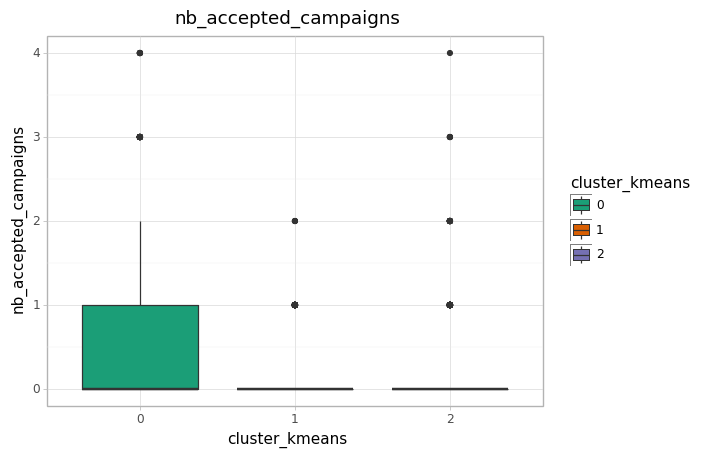

In [10]:
plot_boxplot_by_cluster(df, "nb_accepted_campaigns", "cluster_kmeans", None)

## Share of binery categories per cluster

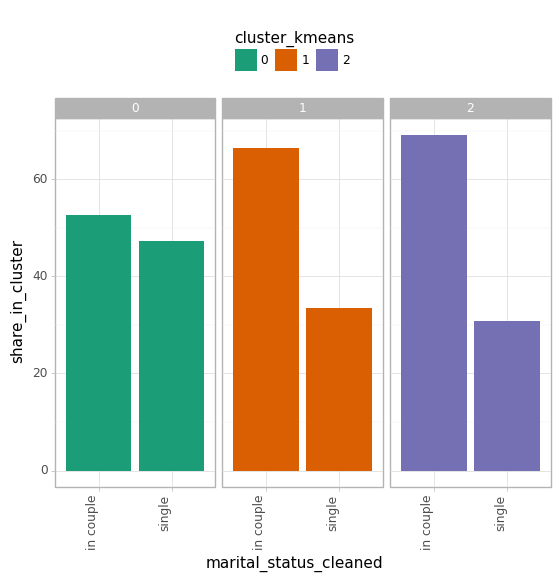

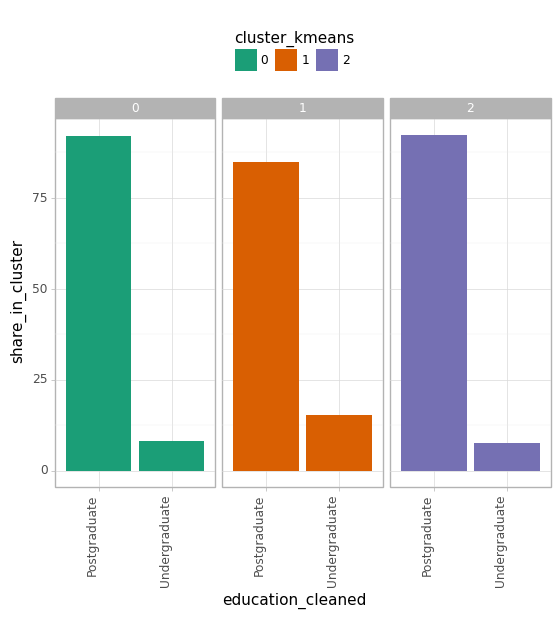

In [11]:
for col in cat_features:
    plot_share_of_binary_vars_per_clusters(df, col, "cluster_kmeans")

## Most important scatters with visible split by clusters

In [12]:
paired_vars = [('income_per_person', 'total_spendings_per_person'),
               ('income_per_person', 'total_purchases'),
               ('total_spendings_per_person', 'total_purchases')]

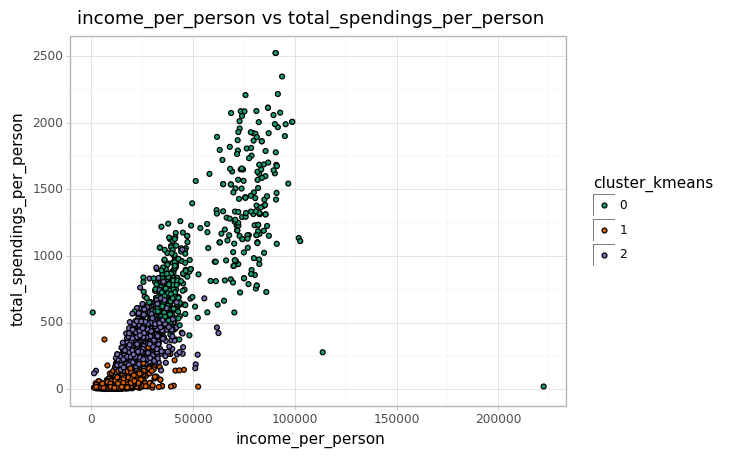

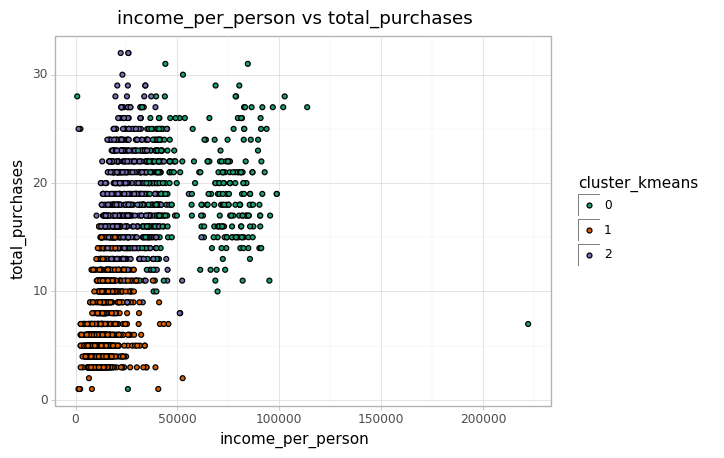

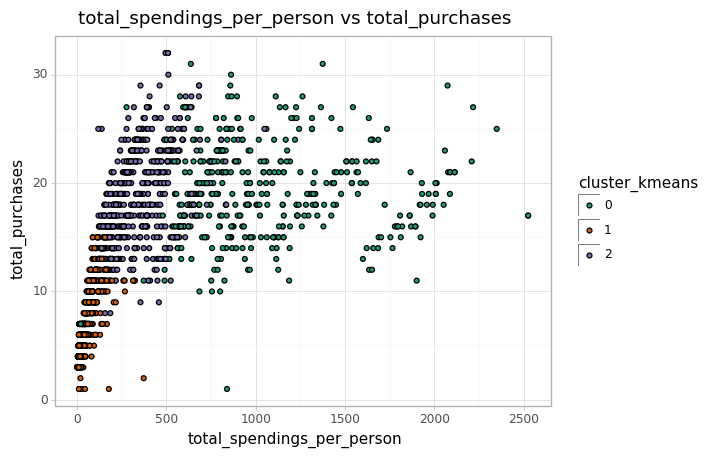

In [13]:
for pair in paired_vars:
    plot_scatter_by_cluster(df, pair[0], pair[1], "cluster_kmeans")